In [2]:
import pandas as pd
import numpy as np
from scipy.linalg import svd, diagsvd
import matplotlib.pyplot as plt

In [3]:
def decompose_matrix(matrix : np.ndarray):
    """
    Decompõe a matriz em U, Sigma e Vt.
    """
    return svd(matrix)

def spoiled_matrix(matrix : np.ndarray, pos : tuple, choices : np.ndarray):
    """
    Cria uma cópia B da matriz de input.
    "Estraga" o valor na posição 'pos'. Valores ficam no intervalo [0.5, 5] com incremento de 0.5
    Devolve B.
    """
    B = matrix.copy()
    random_val = np.random.choice(choices)
    B[*pos] = random_val
    return B

def random_pos(matrix : np.ndarray):
    if isinstance(matrix, np.ndarray):
        idxs = np.argwhere(matrix)
        i = np.random.choice(idxs.shape[0]-1)
        return idxs[i]
    else:
        raise TypeError
    
def get_smaller(eigenvalues : np.ndarray, n : int):
    return np.argsort(eigenvalues)[:n]

def predict_val(matrix : np.ndarray):
    U, s, Vh = decompose_matrix(matrix)
    smaller = get_smaller(s, 50)
    s[smaller] *= 0

    return U @ diagsvd(s, matrix.shape[0], matrix.shape[1]) @ Vh



In [4]:
df = pd.read_csv('ratings_small.csv') # Lê arquivo de dados
df = pd.pivot(df, columns='movieId', index='userId', values='rating') # Cria tabela pivot (userId x movieId)
df_array = df.fillna(0).to_numpy()

In [ ]:
n_exp = 1000 # Número de experimentos
errors = [] # Lista de erros em relação ao valor real (previsão - real)

choices = np.linspace(0.5, 5, 10) # Possíveis escolhas pelo modelo

for i in range(n_exp):
    if i%5 == 0:
        print(i)
    pos = random_pos(df_array)

    initial_val = df_array[*pos]
    spoiled = spoiled_matrix(df_array, pos, choices) # Cria matriz "estragada"

    spoiled_pred = predict_val(spoiled) # Tenta prever o valor real do valor "estragado"

    errors += [abs(spoiled_pred[*pos] - df_array[*pos])] # Adiciona erro absoluto entre o previsto e real

0


In [66]:
errors

[np.float64(1.5039352138612418)]

(array([1., 3., 1., 0., 0., 1., 0., 3., 0., 1.]),
 array([0.5, 0.9, 1.3, 1.7, 2.1, 2.5, 2.9, 3.3, 3.7, 4.1, 4.5]),
 <BarContainer object of 10 artists>)

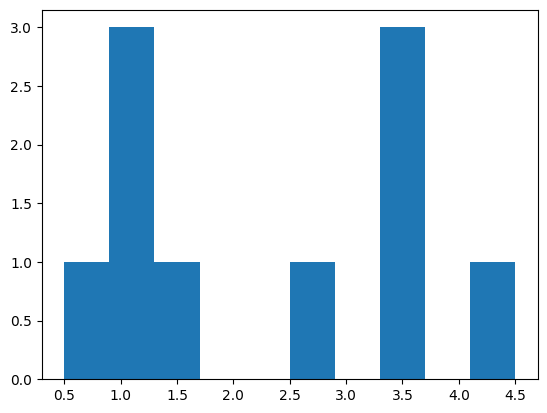

In [32]:
plt.hist(errors)